In [3]:
import pandas as pd

In [5]:
# 도적 직업군 파일 불러오기
df1 = pd.read_csv("data/item_equipment/theif/cadena_equipment.csv")
df2 = pd.read_csv("data/item_equipment/theif/dualblade_equipment.csv")
df3 = pd.read_csv("data/item_equipment/theif/hoyoung_equipment.csv")
df4 = pd.read_csv("data/item_equipment/theif/khali_equipment.csv")
df5 = pd.read_csv("data/item_equipment/theif/nightlord_equipment.csv")
df6 = pd.read_csv("data/item_equipment/theif/nightwalker_equipment.csv")
df7 = pd.read_csv("data/item_equipment/theif/phantom_equipment.csv")
df8 = pd.read_csv("data/item_equipment/theif/shadower_equipment.csv")
df9 = pd.read_csv("data/item_equipment/theif/xenon_equipment.csv")

In [7]:
# df1부터 df9까지 리스트에 담기
df_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9]

# 세로 방향으로 concat (index는 무시하고 새로 부여)
df_all = pd.concat(df_list, ignore_index=True)

# CSV 파일로 저장
df_all.to_csv("theif_item_merged.csv", index=False, encoding='utf-8-sig')  # 윈도우 엑셀 호환 시 utf-8-sig 권장

In [5]:
df = pd.read_csv("theif_item_merged.csv")

In [23]:
df.isnull().sum()

nickname                         0
world                            0
level                            0
job                              0
subclass                         0
                             ...  
golden_hammer_flag               0
scroll_resilience_count          0
scroll_upgradeable_count         0
soul_name                   601260
soul_option                 601260
Length: 111, dtype: int64

/var/folders/1k/kfyrfwj51r7_zts1bndgk56c0000gn/T/ipykernel_87192/1864144930.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=world_counts.index, y=world_counts.values, palette='viridis')


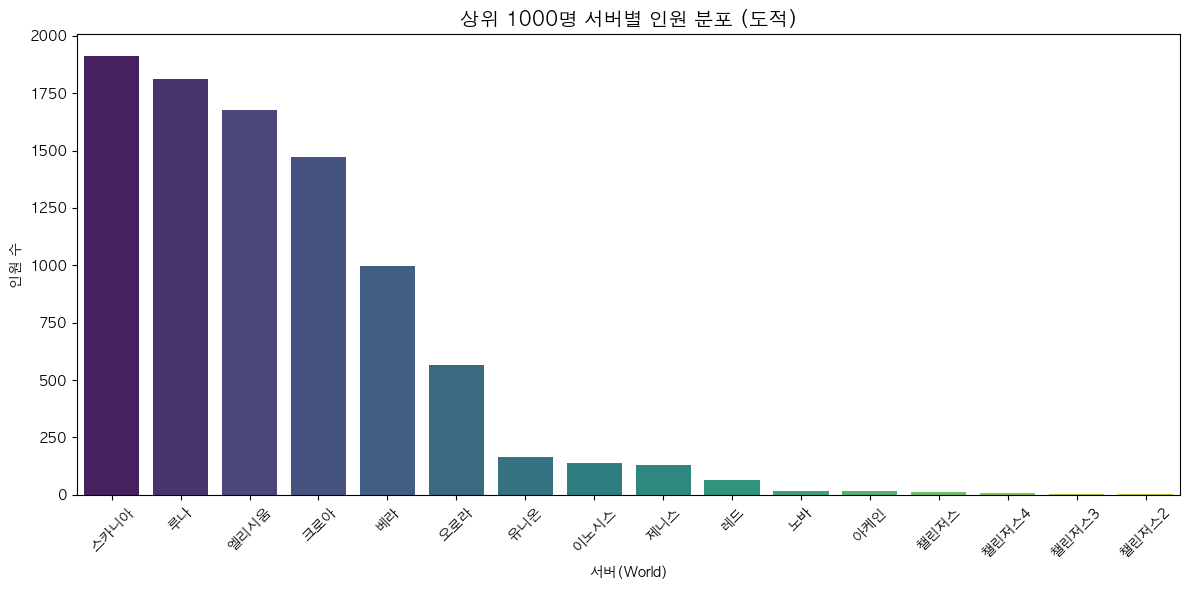

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (애플)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 중복 제거 (즉, 한 사람당 한 번만 카운트)
df_unique = df[['nickname', 'world']].drop_duplicates()

# 서버별 인원 수 집계
world_counts = df_unique['world'].value_counts().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=world_counts.index, y=world_counts.values, palette='viridis')
plt.title('상위 1000명 서버별 인원 분포 (도적)', fontsize=14)
plt.xlabel('서버(World)')
plt.ylabel('인원 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 상위권 유저들은 보통 스카니아, 루나, 엘리시움에 많이 분포되어 있는것을 볼 수 있음.

/var/folders/1k/kfyrfwj51r7_zts1bndgk56c0000gn/T/ipykernel_87192/3283152657.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=job_avg_level, x='subclass', y='level', palette='coolwarm')


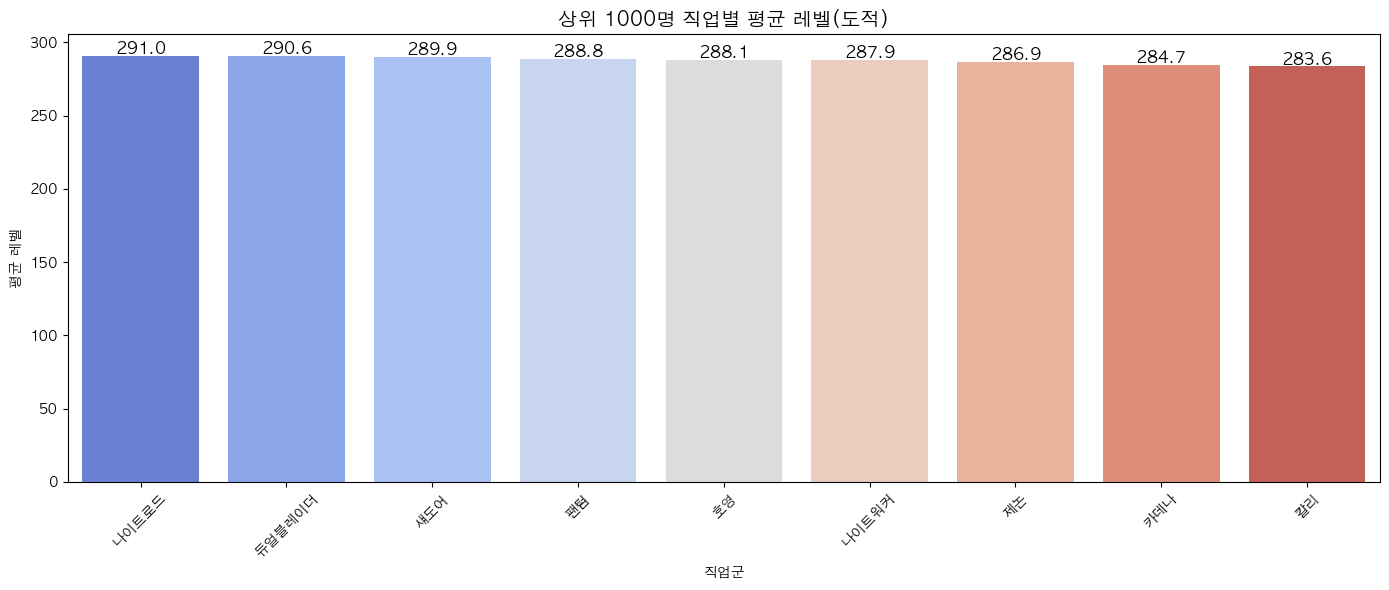

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# 중복 제거
df_unique = df[['nickname', 'subclass', 'level']].drop_duplicates()

# 직업별 평균 레벨 계산
job_avg_level = df_unique.groupby('subclass')['level'].mean().reset_index()
job_avg_level = job_avg_level.sort_values(by='level', ascending=False)

# 시각화
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=job_avg_level, x='subclass', y='level', palette='coolwarm')

# 각 바 위에 숫자 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',  # 소수점 1자리까지 표시
                (p.get_x() + p.get_width() / 2., p.get_height()),  # 바 위치
                ha='center', va='center', fontsize=12, color='black',  # 텍스트 설정
                xytext=(0, 5), textcoords='offset points')  # 텍스트 위치 조정

plt.title('상위 1000명 직업별 평균 레벨(도적)', fontsize=14)
plt.xlabel('직업군')
plt.ylabel('평균 레벨')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 상위권의 평균 레벨의 차이는 비슷하지만 평균이 제일 높은 나이트로드와 제일 낮은 칼리와의 차이는 많이 나는것을 볼 수 있음.

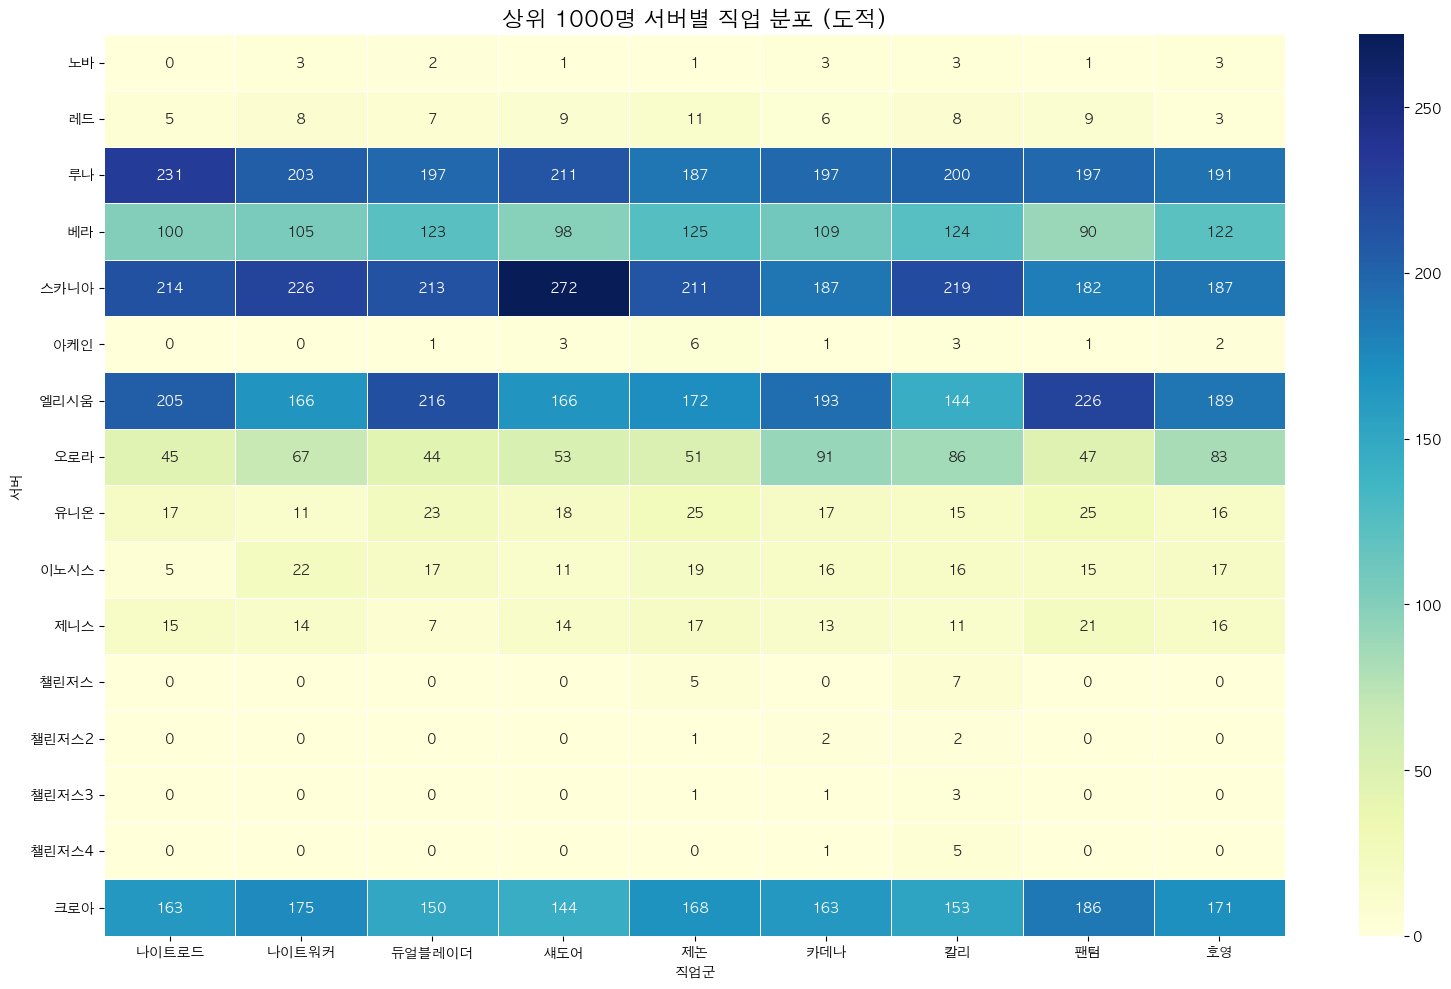

In [90]:
# 중복 제거
df_unique = df[['nickname', 'world', 'subclass']].drop_duplicates()

# 교차표 만들기
pivot_table = pd.pivot_table(df_unique, index='world', columns='subclass', aggfunc='size', fill_value=0)

# 시각화
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=.5, annot=True, fmt='d')
plt.title('상위 1000명 서버별 직업 분포 (도적)', fontsize=16)
plt.xlabel('직업군')
plt.ylabel('서버')
plt.tight_layout()
plt.show()

- 서버별로 각 직업이 어떻게 분포하는지 볼수 있었는데 나이트로드는 루나, 섀도어는 스카니아, 팬텀은 앨리시움 서버에 많이 분포되어있는것을 볼수 있음.

/var/folders/1k/kfyrfwj51r7_zts1bndgk56c0000gn/T/ipykernel_87192/1533777766.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_hat_counts = hat_counts.groupby('preset_number').apply(
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` 

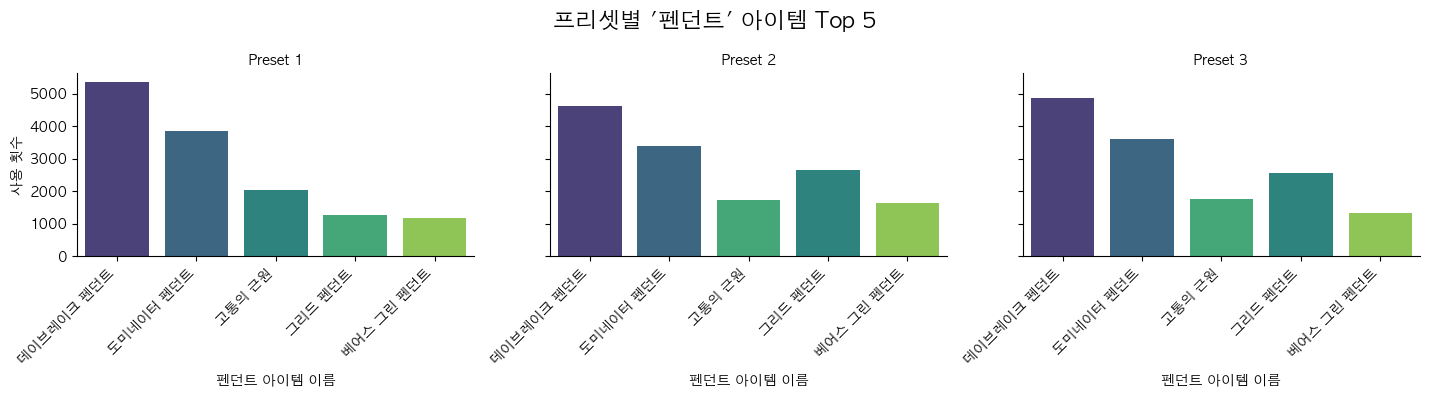

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 펜던트만 필터링
hat_df = df[df['equipment_part'] == '펜던트']

# preset_number, item_name 별 사용 횟수 세기
hat_counts = hat_df.groupby(['preset_number', 'item_name']).size().reset_index(name='count')

# 각 preset에서 Top 5만 추출
top_hat_counts = hat_counts.groupby('preset_number').apply(
    lambda x: x.sort_values('count', ascending=False).head(5)
).reset_index(drop=True)

# 시각화
g = sns.FacetGrid(top_hat_counts, col='preset_number', height=4, aspect=1.2)
g.map_dataframe(sns.barplot, x='item_name', y='count', palette='viridis')

# 제목/레이블 설정
g.set_titles("Preset {col_name}")
g.set_xticklabels(rotation=45, ha='right')
g.set_axis_labels("펜던트 아이템 이름", "사용 횟수")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("프리셋별 '펜던트' 아이템 Top 5", fontsize=16)
plt.tight_layout()
plt.show()

- 주로 보스용으로 많이 사용하는 프리셋 2,3에서 프리셋 1보다 '그리드 펜던트'의 사용횟수가 더 늘어난 것을 볼수 있음.

/var/folders/1k/kfyrfwj51r7_zts1bndgk56c0000gn/T/ipykernel_87192/4206076627.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_hat_counts = hat_counts.groupby('preset_number').apply(
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` f

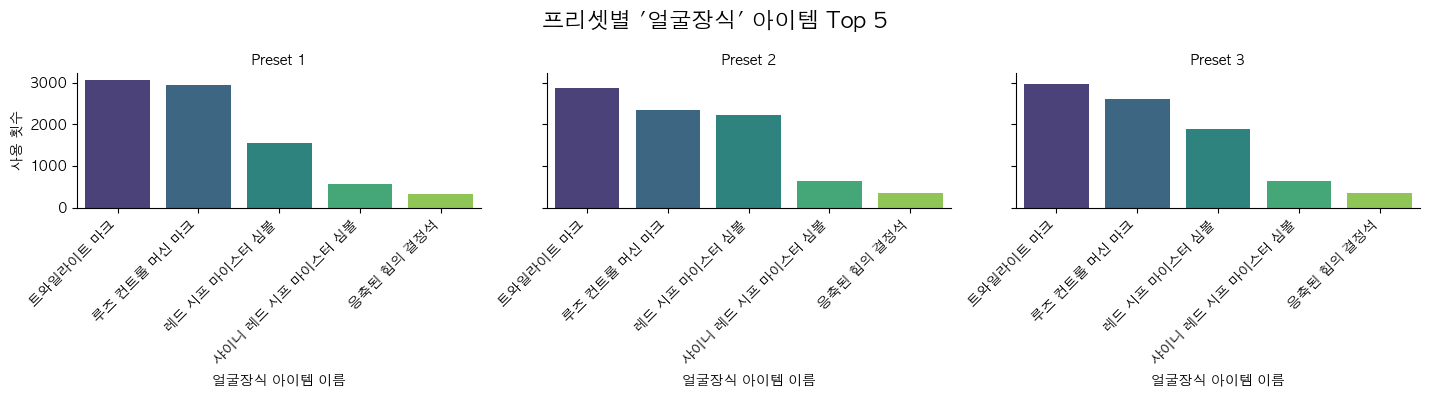

In [107]:
# 얼굴장식만 필터링
hat_df = df[df['equipment_part'] == '얼굴장식']

# preset_number, item_name 별 사용 횟수 세기
hat_counts = hat_df.groupby(['preset_number', 'item_name']).size().reset_index(name='count')

# 각 preset에서 Top 5만 추출
top_hat_counts = hat_counts.groupby('preset_number').apply(
    lambda x: x.sort_values('count', ascending=False).head(5)
).reset_index(drop=True)

# 시각화
g = sns.FacetGrid(top_hat_counts, col='preset_number', height=4, aspect=1.2)
g.map_dataframe(sns.barplot, x='item_name', y='count', palette='viridis')

# 제목/레이블 설정
g.set_titles("Preset {col_name}")
g.set_xticklabels(rotation=45, ha='right')
g.set_axis_labels("얼굴장식 아이템 이름", "사용 횟수")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("프리셋별 '얼굴장식' 아이템 Top 5", fontsize=16)
plt.tight_layout()
plt.show()

- 동일하게 주로 보스용으로 많이 사용하는 프리셋 2,3에서 프리셋 1보다 '레드 시프 마이스터 심볼'의 사용 횟수가 더 늘어난 것을 볼수 있음.

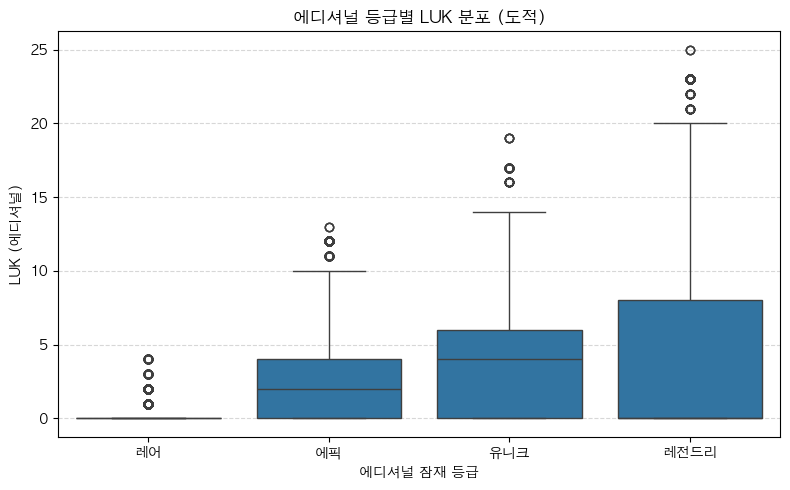

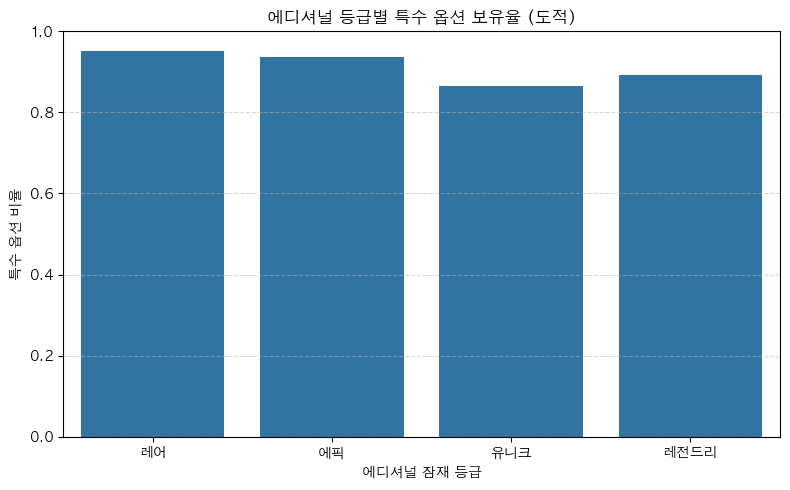

In [101]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 특수 옵션 키워드 정의
special_keywords = [
    "보스 몬스터 공격 시 데미지", "크리티컬 데미지", "올스탯", "아이템 드롭률", "메소 획득량", "공격력", "데미지", "마력",
    "메소 획득량", "모든 스킬레벨", "모든 스킬의 MP 소모", "모든 스킬의 재사용 대기시간", "몬스터 방어율 무시", "몬스터 처치 시",
    "방어력", "상태 이상 내성", "최대 HP", "최대 MP", "크리티컬 확률", "피격 시", "피격 후", "공격 시", "확률로", "4초 당",
    "HP 회복 아이템 및 회복 스킬 효율", "<쓸만한 미스틱 도어> 스킬 사용 가능", "<쓸만한 샤프 아이즈> 스킬 사용 가능", 
    "<쓸만한 어드밴스드 블레스> 스킬 사용 가능", "<쓸만한 윈드 부스터> 스킬 사용 가능", "<쓸만한 컴뱃 오더스> 스킬 사용 가능", 
    "<쓸만한 하이퍼 바디> 스킬 사용 가능", "<쓸만한 헤이스트> 스킬 사용 가능"
]

# 2. LUK % 및 절대 수치 추출 함수
def extract_luk_values(row):
    luk_percent = 0
    luk_flat = 0
    for col in ['additional_potential_option_1', 'additional_potential_option_2', 'additional_potential_option_3']:
        val = row.get(col, '')
        if isinstance(val, str):
            # 퍼센트 증가 추출
            percent_match = re.search(r'LUK\s*:\s*\+(\d+)%', val)
            if percent_match:
                luk_percent += int(percent_match.group(1))
            # 절대 수치 증가 추출
            flat_match = re.search(r'LUK\s*:\s*\+(\d+)(?!%)', val)
            if flat_match:
                luk_flat += int(flat_match.group(1))
    return luk_percent, luk_flat

# 3. 특수 옵션 포함 여부 확인 함수
def has_special_option(row):
    for col in ['additional_potential_option_1', 'additional_potential_option_2', 'additional_potential_option_3']:
        val = row.get(col, '')
        if isinstance(val, str):
            for keyword in special_keywords:
                if keyword in val:
                    return 1
    return 0

# 4. 데이터 불러오기
# 예시: df = pd.read_csv("your_data.csv")
# 이미 데이터프레임이 있다면 아래 코드부터 시작하면 됨

# 5. 전처리 - 새로운 컬럼 생성
df[['luk_percent', 'luk_flat']] = df.apply(lambda row: pd.Series(extract_luk_values(row)), axis=1)
df['has_special'] = df.apply(has_special_option, axis=1)

# 6. 시각화 1 - LUK% 분포 (박스플롯)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='additional_potential_option_grade', y='luk_percent', order=['레어', '에픽', '유니크', '레전드리'])
plt.title("에디셔널 등급별 LUK 분포 (도적)")
plt.xlabel("에디셔널 잠재 등급")
plt.ylabel("LUK (에디셔널)")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 7. 시각화 2 - 특수 옵션 비율 (막대그래프)
special_rate = df.groupby('additional_potential_option_grade')['has_special'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=special_rate, x='additional_potential_option_grade', y='has_special', order=['레어', '에픽', '유니크', '레전드리'])
plt.title("에디셔널 등급별 특수 옵션 보유율 (도적)")
plt.xlabel("에디셔널 잠재 등급")
plt.ylabel("특수 옵션 비율")
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

1. 에디셔널 등급별 LUK% 분포(주가 옵션 기준)
- 레전드리 > 유니크 > 에픽 순으로 LUK%의 중앙 값과 전체 분포가 점점 높아지는 경향을 보임.
- 레전드리 등급은 최대 25%까지 도달한 경우도 있음.
- 이상치도 많지만, 전반적으로 등급이 높을수록 좋은 LUK 옵션을 가질 확률이 높아짐을 시사함.
- 인사이트 : 에디셔널 잠재옵션의 LUK 세팅은 높은 등급일수록 확률적으로 더 좋은 수치를 가짐. 이는 잠재옵션 재세팅에 있어서 등급 업그레이드가 중요한 이유를 설명해줌

2. 에디셔널 등급별 특수 옵션 포함 비율
- 특수 옵션 예시: 아이템 드롭률, 메소 획득량, 재사용 대기시간 감소 등 유틸성 옵션들
- 레전드리에서 50% 가까이 특수 옵션을 보유하고 있음
- 반면 에픽 등급은 10% 내외로 가장 작은 수치를 보임
- 인사이트: 특수 옵션 또한 에디셔널 잠재 등급이 높을수록 등장 확률이 뚜렷하게 증가. 따라서 유틸성 옵션을 노린다면 에디셔널 레전드리 등급이 사실상 필수적이라 할 수 있음.

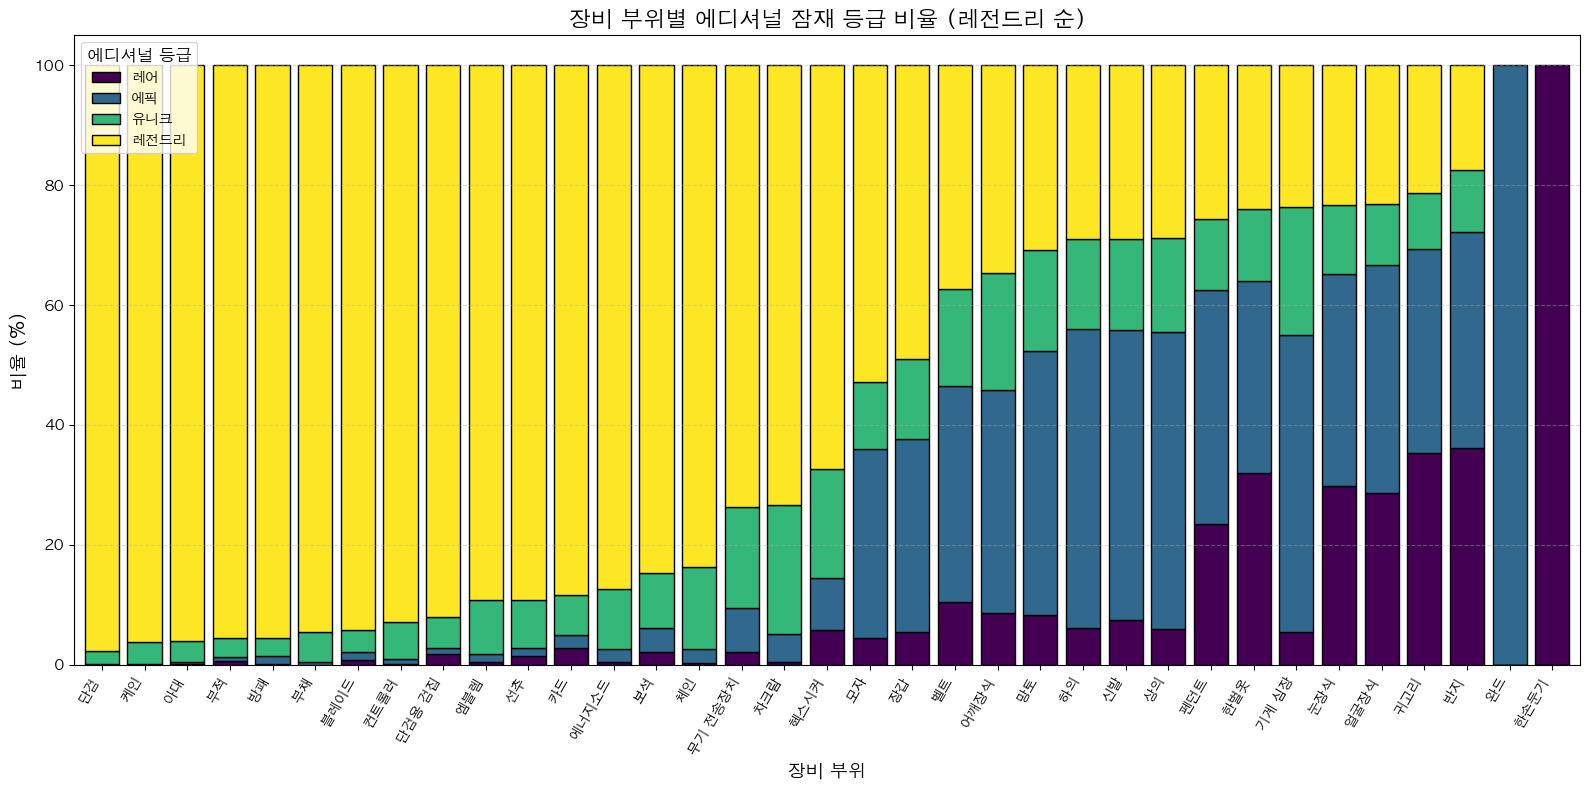

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# 등급별 비율 계산
grade_ratio = pd.crosstab(
    df['equipment_part'],
    df['additional_potential_option_grade'],
    normalize='index'
)

grades = ['레어', '에픽', '유니크', '레전드리']
available_grades = [g for g in grades if g in grade_ratio.columns]
grade_ratio = grade_ratio[available_grades] * 100

# 레전드리 비율 높은 순으로 정렬
if '레전드리' in grade_ratio.columns:
    grade_ratio = grade_ratio.sort_values(by='레전드리', ascending=False)

# 시각화
fig, ax = plt.subplots(figsize=(16, 8))
grade_ratio.plot(
    kind='bar',
    stacked=True,
    colormap='viridis',
    width=0.8,
    edgecolor='black',
    ax=ax
)

ax.set_title("장비 부위별 에디셔널 잠재 등급 비율 (레전드리 순)", fontsize=16, fontweight='bold')
ax.set_xlabel("장비 부위", fontsize=13)
ax.set_ylabel("비율 (%)", fontsize=13)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', fontsize=10)
ax.tick_params(axis='y', labelsize=11)
ax.legend(title="에디셔널 등급", title_fontsize=12, fontsize=10, loc="upper left")
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.subplots_adjust(bottom=0.25)  # x축 레이블 여백 확보
plt.tight_layout()
plt.show()

- 장신구(예 : 반지, 귀고리, 얼굴장식, 눈장식) 쪽에 에디셔널 잠재능력 등급이 레어와 에픽등급이 많은것을 알수 있고 그에 따라 장신구에 특수 옵션을 많이 사용하는것을 유추해볼수 있음. 

In [49]:
import pandas as pd
from scipy.stats import shapiro, levene, ttest_ind

# 1. 데이터 추출
legendary = df[df['additional_potential_option_grade'] == '레전드리']['luk_percent']
unique = df[df['additional_potential_option_grade'] == '유니크']['luk_percent']

# 2. 정규성 검정
print("✅ 정규성 검정 (Shapiro-Wilk Test)")
stat_legendary, p_legendary = shapiro(legendary)
stat_unique, p_unique = shapiro(unique)
print(f"레전드리: p-value = {p_legendary:.4f}")
print(f"유니크:    p-value = {p_unique:.4f}")

# 3. 등분산성 검정
print("\n✅ 등분산성 검정 (Levene's Test)")
stat_levene, p_levene = levene(legendary, unique)
print(f"Levene's test p-value = {p_levene:.4f}")

# 4. 단측 t-test (레전드리 < 유니크)
equal_var = p_levene > 0.05  # 등분산 여부 결정
print(f"\n✅ t-검정 (단측: 레전드리 < 유니크), 등분산 가정 = {equal_var}")
t_stat, p_value = ttest_ind(legendary, unique, equal_var=equal_var, alternative='less')
print(f"t-statistic = {t_stat:.3f}")
print(f"p-value     = {p_value:.4f}")

# 5. 해석
alpha = 0.05
if p_value < alpha:
    print("\n📉 결과: 귀무가설 기각 → 레전드리의 LUK%가 유니크보다 유의미하게 낮음")
else:
    print("\n📊 결과: 귀무가설 채택 → 통계적으로 유의미한 차이는 없음")


✅ 정규성 검정 (Shapiro-Wilk Test)
레전드리: p-value = 0.0000
유니크:    p-value = 0.0000

✅ 등분산성 검정 (Levene's Test)
Levene's test p-value = 0.0000

✅ t-검정 (단측: 레전드리 < 유니크), 등분산 가정 = False
t-statistic = 3.119
p-value     = 0.9991

📊 결과: 귀무가설 채택 → 통계적으로 유의미한 차이는 없음


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 191809.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 64009.
  res = hypotest_fun_out(*samples, **kwds)


귀무가설 
𝐻
0
H 
0
​
 
레전드리 등급 장비의 LUK% 평균은 유니크 등급 장비의 LUK% 평균보다 크거나 같다.

𝜇
레전드리
≥
𝜇
유니크
μ 
레전드리
​
 ≥μ 
유니크
​
 
🎯 대립가설 
𝐻
1
H 
1
​
 
레전드리 등급 장비의 LUK% 평균은 유니크 등급 장비의 LUK% 평균보다 작다.

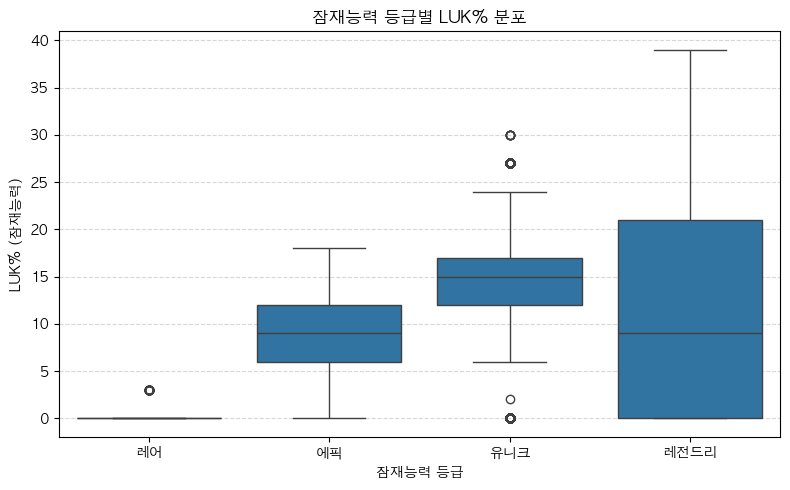

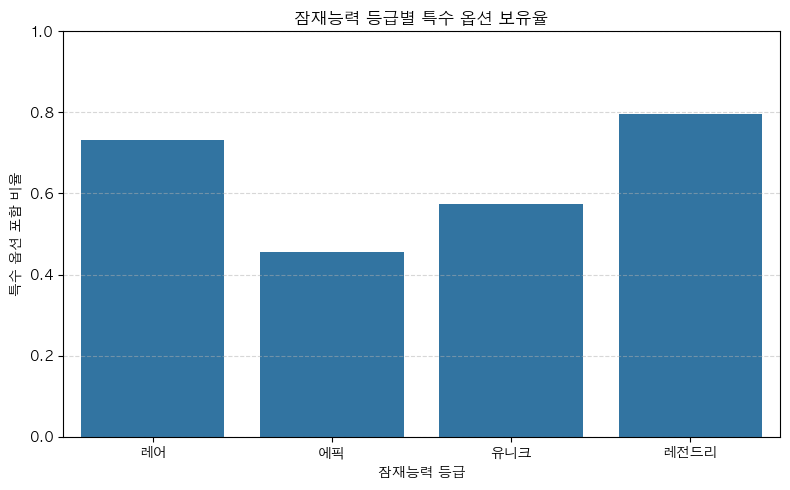

In [44]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 특수 옵션 키워드 정의
special_keywords = [
    "보스 몬스터 공격 시 데미지", "크리티컬 데미지", "올스탯", "아이템 드롭률", "메소 획득량", "공격력", "데미지", "마력",
    "메소 획득량", "모든 스킬레벨", "모든 스킬의 MP 소모", "모든 스킬의 재사용 대기시간", "몬스터 방어율 무시", "몬스터 처치 시",
    "방어력", "상태 이상 내성", "최대 HP", "최대 MP", "크리티컬 확률", "피격 시", "피격 후", "공격 시", "확률로", "4초 당",
    "HP 회복 아이템 및 회복 스킬 효율", "<쓸만한 미스틱 도어> 스킬 사용 가능", "<쓸만한 샤프 아이즈> 스킬 사용 가능", "<쓸만한 어드밴스드 블레스> 스킬 사용 가능", 
    "<쓸만한 윈드 부스터> 스킬 사용 가능", "<쓸만한 컴뱃 오더스> 스킬 사용 가능", "<쓸만한 하이퍼 바디> 스킬 사용 가능", "<쓸만한 헤이스트> 스킬 사용 가능"
    
]

# 2. LUK 추출 함수
def extract_luk_percent(row):
    luk_percent = 0
    for col in ['potential_option_1', 'potential_option_2', 'potential_option_3']:
        val = row.get(col, '')
        if isinstance(val, str):
            match = re.search(r'LUK\s*:\s*\+(\d+)%', val)
            if match:
                luk_percent += int(match.group(1))
    return luk_percent

# 3. 특수 옵션 포함 여부 확인 함수
def has_special_option(row):
    for col in ['potential_option_1', 'potential_option_2', 'potential_option_3']:
        val = row.get(col, '')
        if isinstance(val, str):
            for keyword in special_keywords:
                if keyword in val:
                    return 1
    return 0

# 4. 데이터 불러오기
# 예시: df = pd.read_csv("your_data.csv")
# 이미 데이터프레임이 있다면 아래 코드부터 시작하면 됨

# 5. 전처리 - 새로운 컬럼 생성
df['luk_percent'] = df.apply(extract_luk_percent, axis=1)
df['has_special'] = df.apply(has_special_option, axis=1)

# 6. 시각화 1 - LUK% 분포 (박스플롯)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='potential_option_grade', y='luk_percent', order=['레어', '에픽', '유니크', '레전드리'])
plt.title("잠재능력 등급별 LUK% 분포")
plt.xlabel("잠재능력 등급")
plt.ylabel("LUK% (잠재능력)")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 7. 시각화 2 - 특수 옵션 비율 (막대그래프)
special_rate = df.groupby('potential_option_grade')['has_special'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=special_rate, x='potential_option_grade', y='has_special', order=['레어', '에픽', '유니크', '레전드리'])
plt.title("잠재능력 등급별 특수 옵션 보유율")
plt.xlabel("잠재능력 등급")
plt.ylabel("특수 옵션 포함 비율")
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()